# Neural Network with Keras

## MNIST (handwritting data)

<img src = 'deep_mnist.png'>

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import cv2

In [69]:
data_train =pd.read_csv("mnist_train.csv")
data_test = pd.read_csv("mnist_test.csv")

In [70]:
data_train.shape

(59999, 785)

In [71]:
len(data_train)

59999

In [72]:
data_test.shape

(9999, 785)

In [73]:
data_train.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
x__train =data_train.iloc[:,1:]
y__train = (data_train.iloc[:,0])

In [139]:
x__test =data_test.iloc[:,1:]
y__test =(data_test.iloc[:,0])

In [140]:
x__train.shape

(59999, 784)

In [141]:
len(x__train)

59999

In [142]:
x__test.shape


(9999, 784)

In [144]:
np.unique(y__test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### Show some images

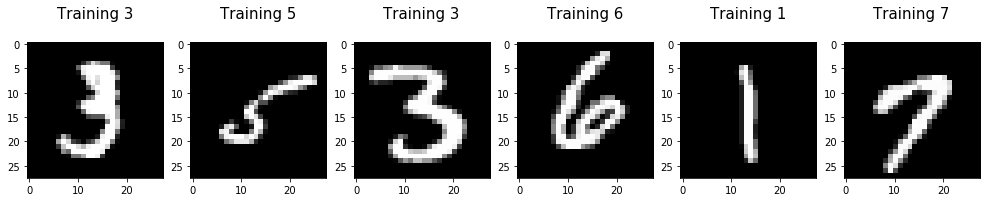

In [145]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(np.array(x__train[9:15]), np.array(y__train[9:15]))):
    plt.subplot(1,7, index+1)
    plt.imshow(np.reshape(image,(28,28)), cmap = plt.cm.gray)
    plt.title('Training %i\n'%label, fontsize = 15)

That's how our data is looklike

In [80]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils
np.random.seed(1671) # for reproducibility

In [81]:
# network and training
NB_EPOCH = 200
BATCH_SIZE = 64
VERBOSE = 1
N_OUTPUTS = 10 # number of outputs = number of digits
OPTIMIZER = SGD() # SGD optimizer, explained later in this chapter
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
RESHAPED = 784

In [82]:
# normalize
#
x__train /= 255
x__test /= 255
print(x__train.shape[0], 'train samples')
print(x__test.shape[0], 'test samples')


59999 train samples
9999 test samples


# Let define our model with one hidden layer

In [83]:
# convert class vectors to binary class matrices
y__train = np_utils.to_categorical(y__train, NB_CLASSES)
y__test = np_utils.to_categorical(y__test, NB_CLASSES)

In [84]:
# 10 outputs
# final stage is softmax
model = Sequential()
model.add(Dense(NB_CLASSES, input_shape=(RESHAPED,)))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                7850      
_________________________________________________________________
activation_4 (Activation)    (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Once we define the model, we have to compile it so that it can be executed by the Keras backend
(either Theano or TensorFlow). There are a few choices to be made during compilation:
- We need to select the **optimizer** that is the specific algorithm used to update weights while we train our model
- We need to select the  **objective function** that is used by the optimizer to navigate the space of weights (frequently, objective functions are called loss function, and the process of optimization
is defined as a process of loss minimization)
- We need to evaluate the trained model

In [85]:
model.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

#### Categorical cross-entropy: This is the multiclass logarithmic loss.

This objective function is suitable for multiclass labels predictions. It is also the default choice in association with softmax activation.

Once the model is compiled, it can be then trained with the fit() function, which specifies a few parameters:
- *epochs* : This is the number of times the model is exposed to the training set. At each iteration, the
optimizer tries to adjust the weights so that the objective function is minimized.
- *batch_size* : This is the number of training instances observed before the optimizer performs a weight update.

We reserved part of the training set for validation. The key idea is that we reserve a part of the training data for measuring the performance on the validation while
training. This is a good practice to follow for any machine learning task.

In [86]:
history = model.fit(x__train, y__train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


Train on 47999 samples, validate on 12000 samples
Epoch 1/200
47999/47999 [==============================] - 2s 39us/step - loss: 1.0781 - accuracy: 0.7512 - val_loss: 0.6567 - val_accuracy: 0.8553
Epoch 2/200
47999/47999 [==============================] - 2s 39us/step - loss: 0.6081 - accuracy: 0.8552 - val_loss: 0.5103 - val_accuracy: 0.8760
Epoch 3/200
47999/47999 [==============================] - 1s 30us/step - loss: 0.5129 - accuracy: 0.8705 - val_loss: 0.4515 - val_accuracy: 0.8857
Epoch 4/200
47999/47999 [==============================] - 1s 30us/step - loss: 0.4665 - accuracy: 0.8782 - val_loss: 0.4192 - val_accuracy: 0.8916
Epoch 5/200
47999/47999 [==============================] - 1s 29us/step - loss: 0.4379 - accuracy: 0.8839 - val_loss: 0.3978 - val_accuracy: 0.8965
Epoch 6/200
47999/47999 [==============================] - 1s 30us/step - loss: 0.4179 - accuracy: 0.8878 - val_loss: 0.3831 - val_accuracy: 0.8983
Epoch 7/200
47999/47999 [==============================] - 1s

#### Once the model is trained, we can evaluate it on the test set that contains new unseen examples. 
In this way, we can get the minimal value reached by the objective function and best value reached by the evaluation metric.

In [87]:
score = model.evaluate(x__test, y__test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

9999/9999 [==============================] - 0s 20us/step
Test score: 0.271035835871918
Test accuracy: 0.9233923554420471


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


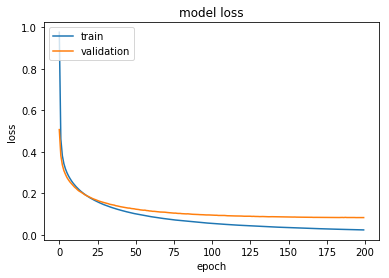

In [92]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


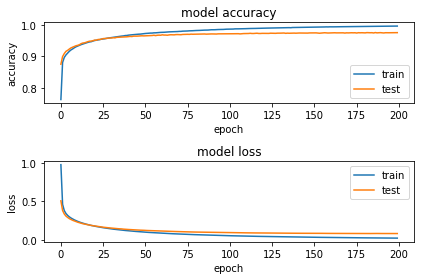

In [107]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

### We have a baseline accuracy of 92.72% on training, 92.62% on validation, and 92.33% on the test.
### This is a good starting point, but we can certainly improve it. Let's see how.

### So we are adding a second hidden layer, with relu as activation function

In [94]:
# 10 outputs
# final stage is softmax
model1 = Sequential()
model1.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model1.add(Activation('relu'))
model1.add(Dense(NB_CLASSES, input_shape=(N_HIDDEN,)))
model1.add(Activation('softmax'))
model1.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_9 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
_________________________________________________________________
activation_10 (Activation)   (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### That's how our model is look like.
### Let compile our model using SGD as optimizer.

In [95]:
model1.compile(loss='categorical_crossentropy', optimizer=OPTIMIZER, metrics=['accuracy'])

### Let's fit the train data to the model

In [96]:
history_ = model1.fit(x__train, y__train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 47999 samples, validate on 12000 samples
Epoch 1/200
47999/47999 [==============================] - 2s 48us/step - loss: 0.9315 - accuracy: 0.7723 - val_loss: 0.4904 - val_accuracy: 0.8801
Epoch 2/200
47999/47999 [==============================] - 2s 38us/step - loss: 0.4566 - accuracy: 0.8814 - val_loss: 0.3777 - val_accuracy: 0.8994
Epoch 3/200
47999/47999 [==============================] - 2s 37us/step - loss: 0.3823 - accuracy: 0.8957 - val_loss: 0.3371 - val_accuracy: 0.9080
Epoch 4/200
47999/47999 [==============================] - 2s 38us/step - loss: 0.3464 - accuracy: 0.9036 - val_loss: 0.3129 - val_accuracy: 0.9132
Epoch 5/200
47999/47999 [==============================] - 2s 39us/step - loss: 0.3232 - accuracy: 0.9094 - val_loss: 0.2959 - val_accuracy: 0.9182
Epoch 6/200
47999/47999 [==============================] - 2s 40us/step - loss: 0.3056 - accuracy: 0.9144 - val_loss: 0.2816 - val_accuracy: 0.9222
Epoch 7/200
47999/47999 [==============================] - 2s 

## Evaluate the model

In [97]:
score = model1.evaluate(x__test, y__test, verbose=VERBOSE)
print("Test score:", score[0])
print('Test accuracy:', score[1])

9999/9999 [==============================] - 0s 24us/step
Test score: 0.07322799390801779
Test accuracy: 0.9768977165222168


### Let's plot the history of the loss and accuracy for train and validation

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


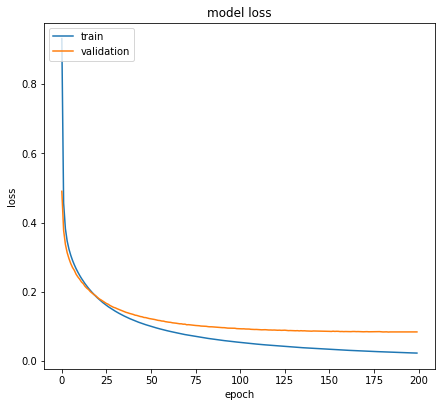

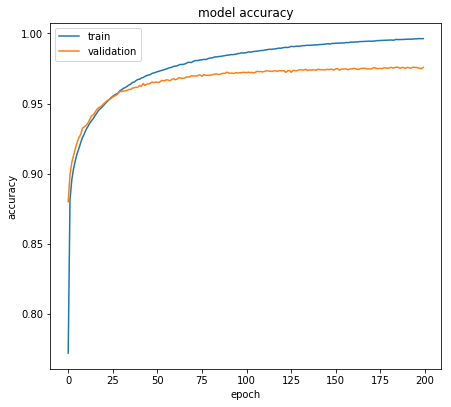

In [172]:
fig = plt.figure()
plt.subplot(2,1,1)
print(history_.history.keys())
# "Loss"
plt.plot(history_.history['loss'])
plt.plot(history_.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


plt.subplot(2,1,2)
#print(history_.history.keys())
# "accuracy"
plt.plot(history_.history['accuracy'])
plt.plot(history_.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


### Let's plot the history of the loss and accuracy for train and test.

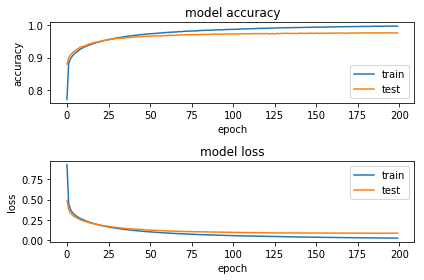

In [106]:
# saving the model
# save_dir = "/results/"
# model_name = 'keras_mnist.h5'
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_.history['accuracy'])
plt.plot(history_.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_.history['loss'])
plt.plot(history_.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [132]:
predictions = predicted_classes = model1.predict_classes(x__test)

predictions


array([2, 1, 0, ..., 4, 5, 6])

In [150]:
## The accuracy

In [151]:
score = accuracy_score(y__test, predictions)
score

0.976897689768977

We can see that the model perform better. By adding two hidden layers, we reached 99.60% on the training set, 97.51% on validation, and 97.63% on the test.

If you want, you can play by adding more layers and see what could happen. 

## Thank you! See you for the next model with EMNIST data

# EMNIST

In [156]:
emnist_train =pd.read_csv("emnist-balanced-train.csv")
emnist_test = pd.read_csv("emnist-balanced-test.csv")

In [157]:
emnist_train.head()

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [158]:
emnist_test.head()

,41,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
emnist_train.shape

(112799, 785)

In [160]:
emnist_test.shape

(18799, 785)

In [161]:
X_train = (emnist_train.iloc[:,1:])
#Y_train = np.array(emnist_train['45'])
Y_train = emnist_train.iloc[:, 0]

In [162]:
X_train.shape

(112799, 784)

In [163]:
np.unique(Y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

In [164]:
X_test =(emnist_test.drop(['41'], axis = 1))
Y_test =(emnist_test.iloc[:,0])

In [165]:
np.unique(Y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46])

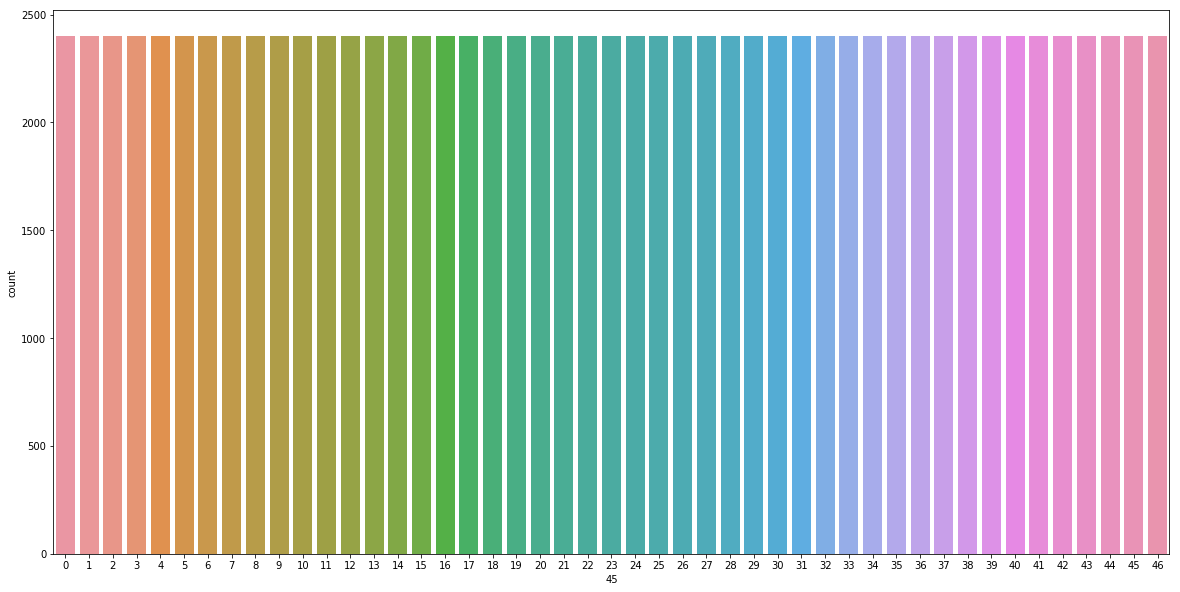

In [166]:
#print (Y_train.value_counts())
#print (emnist_train['45'].value_counts())
plt.figure(figsize=(20,10))
sns.countplot(emnist_train['45'])
plt.show()# looks kinda okay
     

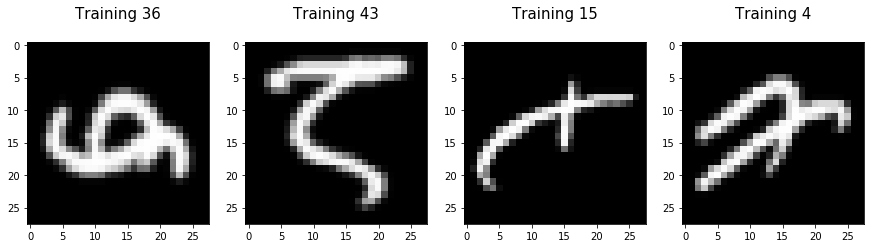

In [167]:
plt.figure(figsize=(15,4))
for index, (image, label) in enumerate(zip(np.array(X_train[0:4]), np.array(Y_train[0:5]))):
    plt.subplot(1,4, index+1)
    plt.imshow(np.reshape(image,(28,28)), cmap = plt.cm.gray)
    plt.title('Training %i\n'%label, fontsize = 15)